# Engineering Placement Predictions

#### Import Relevant Libraries

In [173]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import autoreload
import os
import sys
import csv

from collections import defaultdict, Counter

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline
%reload_ext autoreload
%autoreload 2

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

sb.set_style("darkgrid")
sb.set()

#### Load and Collect Data

In [132]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\Engineering Placements Prediction\collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


#### Data Statistical Information

In [133]:
df.shape

(2966, 8)

In [134]:
df.describe().round()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.0,2966.0,2966.0,2966.0,2966.0,2966.0
mean,21.0,1.0,7.0,0.0,0.0,1.0
std,1.0,1.0,1.0,0.0,0.0,0.0
min,19.0,0.0,5.0,0.0,0.0,0.0
25%,21.0,0.0,6.0,0.0,0.0,0.0
50%,21.0,1.0,7.0,0.0,0.0,1.0
75%,22.0,1.0,8.0,1.0,0.0,1.0
max,30.0,3.0,9.0,1.0,1.0,1.0


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [136]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

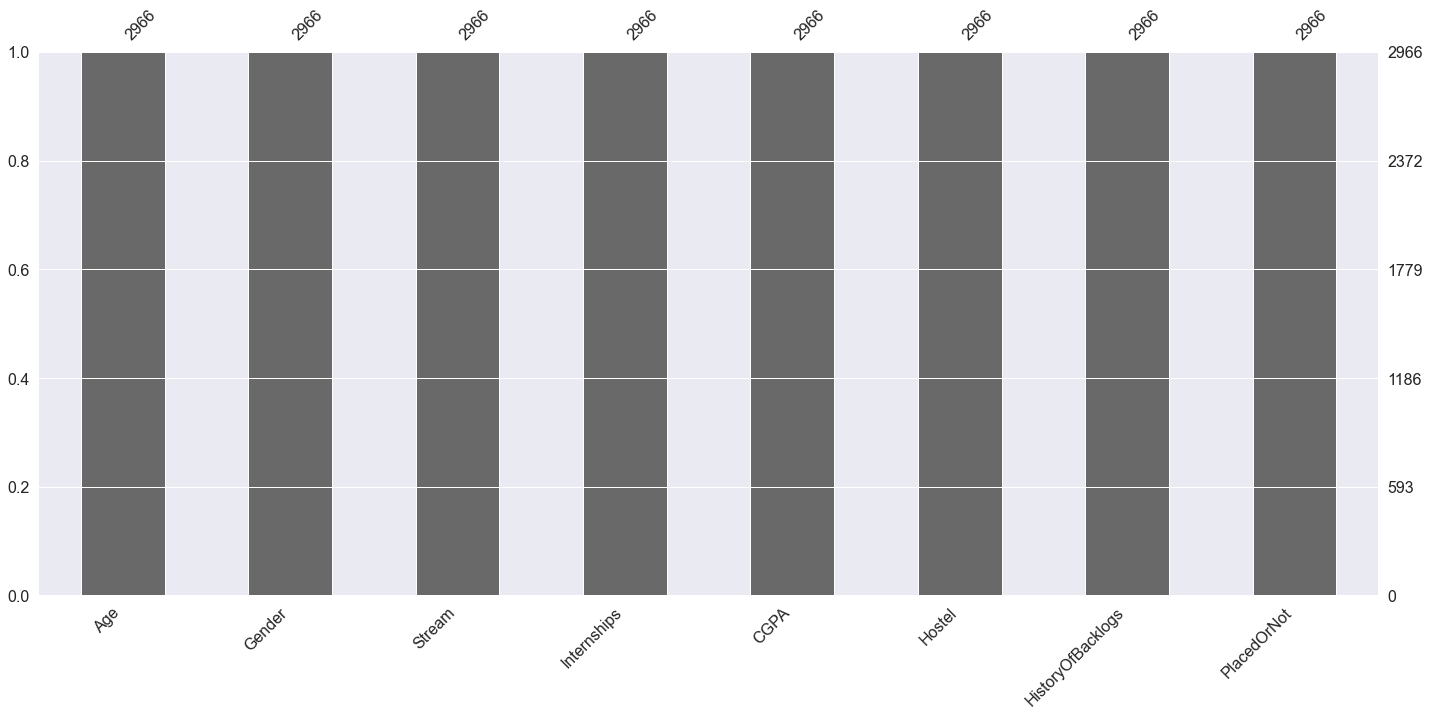

In [137]:
msno.bar(df)

Text(0.5, 1.0, "Pearson's Correlation Coefficient of columns")

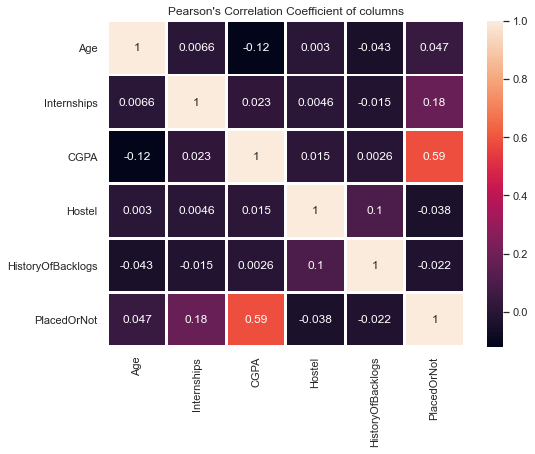

In [138]:
plt.figure(figsize = (8, 6))
sb.heatmap(df.corr(), annot = True, linewidths = 2)
plt.title("Pearson's Correlation Coefficient of columns")

In [139]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


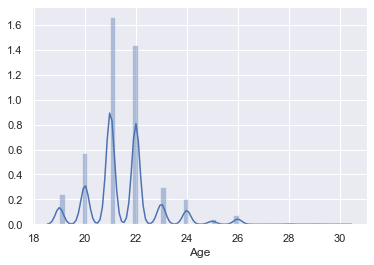

In [140]:
sb.distplot(df["Age"])

Text(0.5, 1.0, 'Stream Registration of student placement')

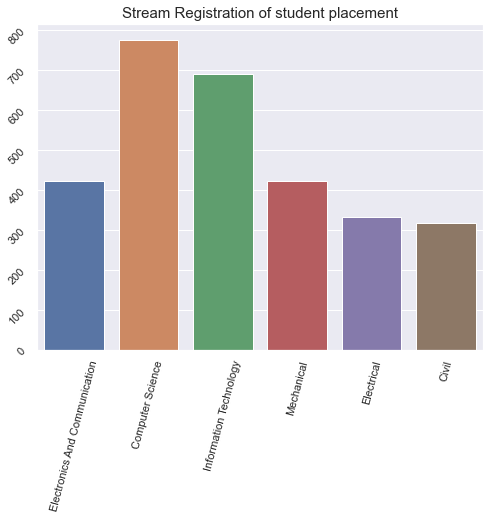

In [141]:
plt.figure(figsize = (8, 6))
sb.countplot(df["Stream"])
plt.yticks(rotation = 45)
plt.ylabel(None)
plt.xticks(rotation = 75)
plt.xlabel(None)
plt.title("Stream Registration of student placement", fontsize=(15))

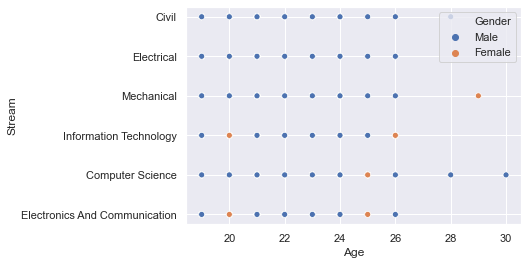

In [142]:
sb.scatterplot(x = df["Age"], y = df["Stream"], hue = df["Gender"])

#### Feature Engineering
##### using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning

In [143]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


#### Define the predictor and Target data of the Outcome

In [144]:
x = df.drop(columns = ["PlacedOrNot"])
y = df[["PlacedOrNot"]]

In [145]:
le = LabelEncoder()

x = x.apply(le.fit_transform)

Train and Test the existing data

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Build a Machine Learning Model to predict the Target

In [147]:
DT_model = DecisionTreeClassifier()

DT_model.fit(x, y)

pred = DT_model.predict(x_train)

print(pred)

[1 0 1 ... 0 0 1]


In [165]:
acc_score = accuracy_score(y_train, pred)
print(round(acc_score * 100, 2), "%")

91.78 %


In [177]:
report = classification_report(y_train, pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1076
           1       0.98      0.87      0.92      1296

    accuracy                           0.92      2372
   macro avg       0.92      0.92      0.92      2372
weighted avg       0.92      0.92      0.92      2372



In [181]:
print(DT_model.predict_proba(x))

[[0.         1.        ]
 [0.5        0.5       ]
 [0.33333333 0.66666667]
 ...
 [0.86666667 0.13333333]
 [0.51851852 0.48148148]
 [0.         1.        ]]


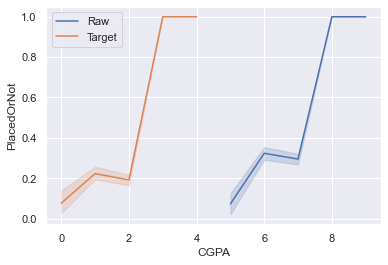

In [196]:
sb.lineplot(df["CGPA"], df["PlacedOrNot"], label = "Raw")
sb.lineplot(x_train["CGPA"], pred, label = "Target")
plt.legend(loc = "best")